Data Preprocessing
- HTML태그, 특수문자, 이모티콘
- 정규표현식
- 불용어 (Stopwords)
- 어간추출 (Stemming)
- 음소표기법 (Lemmatizing)

# Tokenize
- 여러 방식이 있다. 자신이 필요한 것에 맞게 사용하자

In [4]:
from nltk.tokenize import sent_tokenize
from nltk import download

In [5]:
download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skarn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
text_sent = "Hello world. It's good to see you. Thanks for buying this book."
print(sent_tokenize(text_sent))

['Hello world.', "It's good to see you.", 'Thanks for buying this book.']


In [6]:
text_sent = "IP is 182.153.123.1. Since I'm actively looking for Ph.D students"

## 예외 처리가 되었다.
print(sent_tokenize(text_sent))

['IP is 182.153.123.1.', "Since I'm actively looking for Ph.D students"]


In [7]:
from nltk.tokenize import word_tokenize

In [8]:
text_sent = "Hello world. It's good to see you. Thanks for buying this book."
print(word_tokenize(text_sent))

['Hello', 'world', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Thanks', 'for', 'buying', 'this', 'book', '.']


In [9]:
text_sent = "I can't"
print(word_tokenize(text_sent))

['I', 'ca', "n't"]


In [12]:
from nltk.tokenize import WordPunctTokenizer

In [15]:
tokenzier = WordPunctTokenizer()

text_sent = "Hello world. It's good to see you. Thanks for buying this book. I can't"
print(tokenzier.tokenize(text_sent))

['Hello', 'world', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Thanks', 'for', 'buying', 'this', 'book', '.', 'I', 'can', "'", 't']


# Normalization 
- 규칙기반을 통해 단어들을 통합시켜서 같은 단어로 만듬
    - HTML태그 제거, 뉴스 시간 제거, 기자 이름 제거 등

# Cleaning
- corpus로부터 noisy를 제거
    - 대소문자 통합
        - `US` vs `us`
- 등장 빈도 적은 단어 제거
- 길이가 짧은 단어 제거
    - a, it, at, to, on, in, by 등
    - 한국에서는 적용이 힘들다

# Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer

In [22]:
# download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\skarn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [23]:
lemma = WordNetLemmatizer()

word = ["doing", "policy", "have", "going", "dies", "has", "watched"]

for _ in word:
    print(lemma.lemmatize(_))

doing
policy
have
going
dy
ha
watched


In [26]:
lemma.lemmatize('has', 'v')


'do'

In [27]:
lemma.lemmatize('doing', 'v')

'do'

In [28]:
lemma.lemmatize('watched', 'v')

'watch'

In [30]:
lemma.lemmatize('is', 'v')

'be'

In [33]:
text_sent = "Hello world. It's good to see you. Thanks for buying this book. I can't"
print(text_sent.lower())

hello world. it's good to see you. thanks for buying this book. i can't


In [34]:
text_sent = "Hello world. It's good to see you. Thanks for buying this book. I can't"
print(text_sent.upper())

HELLO WORLD. IT'S GOOD TO SEE YOU. THANKS FOR BUYING THIS BOOK. I CAN'T


# RE

In [35]:
import re

In [37]:
r = re.compile('a.c')

r.search('a!c')

<re.Match object; span=(0, 3), match='a!c'>

In [48]:
r = re.compile('a?c')

r.search('aac')

<re.Match object; span=(1, 3), match='ac'>

In [50]:
text = '''100 John PROG 101 James STUD 102 Mac STUD'''

re.sub("[^a-zA-Z]", " ", text)

'    John PROG     James STUD     Mac STUD'

In [86]:
text = '''100 John PROG 101 James STUD 102 Mac STUD'''

re.findall("[A-Z][a-z]+", text)
re.sub("[A-Z][a-z]+", "", text)

'100  PROG 101  STUD 102  STUD'

In [95]:
text = '''100 John PROG 101 James STUD 102 Mac STUD'''

re.findall(r"\b[A-Z]{1}[a-z]+\b", text)

['John', 'James', 'Mac']

In [96]:
from nltk.tokenize import RegexpTokenizer

In [98]:
tokenizer = RegexpTokenizer('[\w]+')

print(tokenizer.tokenize("Hello world. It's good to see you. Thanks for buying this book. I can't"))

['Hello', 'world', 'It', 's', 'good', 'to', 'see', 'you', 'Thanks', 'for', 'buying', 'this', 'book', 'I', 'can', 't']


In [100]:
tokenizer = RegexpTokenizer('[\s]+', gaps=True)

print(tokenizer.tokenize("Hello world. It's good to see you. Thanks for buying this book. I can't"))

['Hello', 'world.', "It's", 'good', 'to', 'see', 'you.', 'Thanks', 'for', 'buying', 'this', 'book.', 'I', "can't"]


# Stemming

In [101]:
from nltk.stem import PorterStemmer

In [102]:
stemming = PorterStemmer()

In [103]:
word = ['formalize', 'allowance', ' electricical']

In [106]:
for _ in word:
    print(stemming.stem(_))

formal
allow
 electric


# Stopwords

In [108]:
from nltk.corpus import stopwords

In [113]:
print(stopwords.readme())

Stopwords Corpus

This corpus contains lists of stop words for several languages.  These
are high-frequency grammatical words which are usually ignored in text
retrieval applications.

They were obtained from:
http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/

The stop words for the Romanian language were obtained from:
http://arlc.ro/resources/

The English list has been augmented
https://github.com/nltk/nltk_data/issues/22

The German list has been corrected
https://github.com/nltk/nltk_data/pull/49

A Kazakh list has been added
https://github.com/nltk/nltk_data/pull/52

A Nepali list has been added
https://github.com/nltk/nltk_data/pull/83

An Azerbaijani list has been added
https://github.com/nltk/nltk_data/pull/100

A Greek list has been added
https://github.com/nltk/nltk_data/pull/103

An Indonesian list has been added
https://github.com/nltk/nltk_data/pull/112



In [118]:
stopwords = stopwords.words('english')

In [127]:
example = """Family is not an important thing, It's everything"""

result = list()
for word in WordPunctTokenizer().tokenize(example):
    if word not in stopwords:
        result.append(word)
print(result)

['Family', 'important', 'thing', ',', 'It', "'", 'everything']


# Word Cloud 

In [135]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [129]:
text = """From the day we arrive on the planet
And blinking, step into the sun
There's more to see than can ever be seen
More to do than can ever be done
There's far too much to take in here
More to find than can ever be found
But the sun rolling high
Through the sapphire sky
Keeps great and small on the endless round
It's the circle of life
And it moves us all
Through despair and hope
Through faith and love
Till we find our place
On the path unwinding
In the circle
The circle of life
It's the circle of life
And it moves us all
Through despair and hope
Through faith and love
Till we find our place
On the path unwinding
In the circle
The circle of life"""

In [171]:
wordcloud = WordCloud().generate(text)
wordcloud.words_

AttributeError: 'dict' object has no attribute 'sort'

In [181]:
wordcloud.words_.values()

dict_values([1.0, 0.6666666666666666, 0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666])

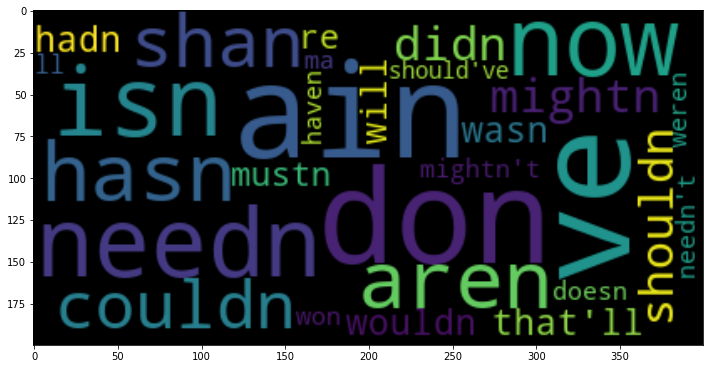

In [165]:
wordcloud = WordCloud().generate(' '.join(set(stopwords)))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear');

# 형태소 분석
- 의미를 가지는 최소 단위

## kkma 

In [182]:
import konlpy

In [183]:
dir(konlpy)

['__author__',
 '__builtins__',
 '__cached__',
 '__copyright__',
 '__doc__',
 '__email__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__summary__',
 '__title__',
 '__url__',
 '__version__',
 'about',
 'absolute_import',
 'corpus',
 'data',
 'download',
 'downloader',
 'init_jvm',
 'internals',
 'jvm',
 'tag',
 'utils']

In [195]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [197]:
kkma = Kkma()

pprint(kkma.sentences(u'네 안녕하세요 반갑습니다.')) # 문장별 분류가 가능하다.

['네 안녕하세요', '반갑습니다.']


In [198]:
pprint(kkma.pos(u'하늘을 나는 자동차.')) # 품사

[('하늘', 'NNG'),
 ('을', 'JKO'),
 ('날', 'VV'),
 ('는', 'ETD'),
 ('자동차', 'NNG'),
 ('.', 'SF')]


[꼬꼬마 품사 정보](http://kkma.snu.ac.kr/documents/index.jsp?doc=postag)

## Hannanum 

In [199]:
from konlpy.tag import Hannanum

In [200]:
han = Hannanum()

In [201]:
pprint(han.analyze(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))
## 여러가지 형태학적 해석법을 보여준다.

[[[('아버지', 'ncn'), ('가', 'jcc')], [('아버지', 'ncn'), ('가', 'jcs')]],
 [[('방', 'nbu'), ('에', 'jca')], [('방', 'ncn'), ('에', 'jca')]],
 [[('들', 'pvg'), ('어', 'ecx'), ('가', 'px'), ('시', 'ep'), ('ㄴ다', 'ef')],
  [('듣', 'pvg'), ('어', 'ecx'), ('가', 'px'), ('시', 'ep'), ('ㄴ다', 'ef')],
  [('들어가', 'pvg'), ('시', 'ep'), ('ㄴ다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]],
 [],
 [[('안녕', 'ncps'), ('하세', 'ncpa'), ('요', 'ncn')],
  [('안녕', 'ncps'), ('하', 'xsms'), ('세요', 'ef')],
  [('안녕', 'ncps'), ('하', 'xsms'), ('세', 'ef'), ('요', 'jxf')]],
 [[('.', 'sf')], [('.', 'sy')]],
 [],
 [[('하늘', 'ncn'), ('을', 'jco')]],
 [[('나', 'ncn'), ('는', 'jxc')],
  [('나', 'npp'), ('는', 'jxc')],
  [('나', 'pvg'), ('는', 'etm')],
  [('나', 'px'), ('는', 'etm')],
  [('나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')],
  [('나', 'pvg'), ('아', 'ef'), ('는', 'etm')],
  [('나', 'px'), ('아', 'ecs'), ('는', 'jxc')],
  [('나', 'px'), ('아', 'ef'), ('는', 'etm')],
  [('날', 'pvg'), ('는', 'etm')]],
 [[('자동차', 'ncn')], [('자동', 'ncn'), ('차', 'ncn')]]]


In [203]:
pprint(han.morphs(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))
## 형태학적 해석

['아버지',
 '가',
 '방',
 '에',
 '들',
 '어',
 '가',
 '시ㄴ다',
 '.',
 '안녕',
 '하',
 '세',
 '요',
 '.',
 '하늘',
 '을',
 '나',
 '는',
 '자동차']


In [204]:
pprint(han.nouns(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))
## 명사가 뭐가 잇냐

['아버지', '방', '안녕', '하늘', '나', '자동차']


In [205]:
pprint(han.pos(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))
## 품사 태깅

[('아버지', 'N'),
 ('가', 'J'),
 ('방', 'N'),
 ('에', 'J'),
 ('들', 'P'),
 ('어', 'E'),
 ('가', 'P'),
 ('시ㄴ다', 'E'),
 ('.', 'S'),
 ('안녕', 'N'),
 ('하', 'X'),
 ('세', 'E'),
 ('요', 'J'),
 ('.', 'S'),
 ('하늘', 'N'),
 ('을', 'J'),
 ('나', 'N'),
 ('는', 'J'),
 ('자동차', 'N')]


In [206]:
from konlpy.tag import Komoran

In [207]:
ko = Komoran()
# pos. morph, nouns

In [209]:
pprint(ko.nouns(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))

['아버지', '방', '안녕하세요', '하늘', '자동차']


In [210]:
from konlpy.tag import Twitter

In [211]:
tw = Twitter()

C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [212]:
pprint(tw.nouns(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))

['아버지', '방', '하늘', '나', '자동차']


In [214]:
pprint(tw.pos(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation'),
 ('안녕하세요', 'Adjective'),
 ('.', 'Punctuation'),
 ('하늘', 'Noun'),
 ('을', 'Josa'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('자동차', 'Noun')]


# 한국어 영화 리뷰 분석